In [153]:
import pymongo
import numpy as np

#Connect to mongoDB and get data from collection
client = pymongo.MongoClient() 
db = client.TrainingDataDB 

currentExpData = []
extractedExpData = []
for i in range(1,33):
    expCollectionName = "TakeOffExp"+str(i)
    
    expCollection = db[expCollectionName]
    
    expDocuments = expCollection.find({})
    currentTrialData = []
    for expDocument in expDocuments:
        expDataArray = expDocument['data']
        currentExpData.append(expDataArray)
        currentTrialData.append(expDataArray)
    currTrial = np.array(currentTrialData) #make it into numpy array
    #print currTrial.shape
    
    #-----Take gradient of all 10 features-----------
    gAccX = np.gradient(currTrial[:,0])
    gAccY = np.gradient(currTrial[:,1])
    gAccZ = np.gradient(currTrial[:,2])
    gAccMag = np.gradient(currTrial[:,3])
    gGyrX = np.gradient(currTrial[:,4])
    gGyrY = np.gradient(currTrial[:,5])
    gGyrZ = np.gradient(currTrial[:,6])
    gPitch = np.gradient(currTrial[:,7])
    gRoll = np.gradient(currTrial[:,8])
    gAlt = np.gradient(currTrial[:,9])
    gradientArray = np.array([gAccX, gAccY, gAccZ, gAccMag, gGyrX, gGyrY, gGyrZ, gPitch, gRoll, gAlt])
    gradientArray = gradientArray.T #take transpose to get them as columns instead of rows 
    
    #-----Std, mean, var, max on raw and gradient data--------------
    currTrialStd = np.std(currTrial, axis=0)
    currTrialMean = np.mean(currTrial, axis=0)
    currTrialVar = np.var(currTrial, axis=0)
    currTrialMax = np.max(currTrial, axis=0)
    gradientStd = np.std(gradientArray, axis=0)
    gradientMean = np.mean(gradientArray, axis=0)
    gradientVar = np.mean(gradientArray, axis=0)
    gradientMax = np.max(gradientArray, axis=0)
    
    #--------combine them all------------------------------------
    currTrialAllExtData = np.concatenate((currTrialStd, currTrialMean, currTrialVar, currTrialMax,
                                         gradientStd, gradientMean, gradientVar, gradientMax), axis=0)
    extractedExpData.append(currTrialAllExtData)

expertDataArray = np.array(currentExpData)
expertExtractedDataArray = np.array(extractedExpData)
print expertExtractedDataArray.shape
#print expertDataArray.shape
#print discExpDataArray

(32L, 80L)


In [154]:
currentNovData = []
extractedNovData = []
for j in range (1,57):
    novCollectionName = "TakeOffNov"+str(j)
    
    novCollection = db[novCollectionName]
    
    novDocuments = novCollection.find({})
    currentNovTrialData = []
    if j==3:
        print "Skipping Trial #3" #Due to null values from the sensor which cause the classifier to crash
    else:
        for novDocument in novDocuments:
            novDataArray = novDocument['data']
            currentNovData.append(novDataArray)
            currentNovTrialData.append(novDataArray)
        currNovTrial = np.array(currentNovTrialData) #make it into numpy array
        #print currNovTrial.shape
        
         #-----Take gradient of all 10 features-----------
        gAccX = np.gradient(currNovTrial[:,0])
        gAccY = np.gradient(currNovTrial[:,1])
        gAccZ = np.gradient(currNovTrial[:,2])
        gAccMag = np.gradient(currNovTrial[:,3])
        gGyrX = np.gradient(currNovTrial[:,4])
        gGyrY = np.gradient(currNovTrial[:,5])
        gGyrZ = np.gradient(currNovTrial[:,6])
        gPitch = np.gradient(currNovTrial[:,7])
        gRoll = np.gradient(currNovTrial[:,8])
        gAlt = np.gradient(currNovTrial[:,9])
        gradientArray = np.array([gAccX, gAccY, gAccZ, gAccMag, gGyrX, gGyrY, gGyrZ, gPitch, gRoll, gAlt])
        gradientArray = gradientArray.T #take transpose to get them as columns instead of rows 
        
        #-----std, mean, var, max on raw and gradient data---------
        currNovTrialStd = np.std(currNovTrial, axis=0)
        currNovTrialMean = np.mean(currNovTrial, axis=0)
        currNovTrialVar = np.var(currNovTrial, axis=0)
        currNovTrialMax = np.max(currNovTrial, axis=0)
        gradientNovStd = np.std(gradientArray,axis=0)
        gradientNovMean = np.mean(gradientArray, axis=0)
        gradientNovVar = np.var(gradientArray, axis=0)
        gradientNovMax = np.max(gradientArray, axis=0)
        
        currNovTrialAllExtData = np.concatenate((currNovTrialStd, currNovTrialMean, currNovTrialVar, currNovTrialMax,
                                                gradientNovStd, gradientNovMean, gradientNovVar, gradientNovMax),axis=0)
        extractedNovData.append(currNovTrialAllExtData)
    
#print currentNovData

noviceDataArray = np.array(currentNovData)
noviceExtractedDataArray = np.array(extractedNovData)
print noviceExtractedDataArray.shape
#print noviceDataArray.shape

Skipping Trial #3
(55L, 80L)


In [155]:
#Consolidate all data 
allData = np.concatenate((expertDataArray,noviceDataArray), axis=0)
#allData.shape

#Consolidate feature extracted data
allExtractedData = np.concatenate((expertExtractedDataArray,noviceExtractedDataArray),axis=0)
allExtractedData.shape

(87L, 80L)

In [156]:
#Create labels
expert_rows, expert_columns = expertExtractedDataArray.shape
#print expert_rows
expert_labels = np.zeros(expert_rows,)
#print expert_labels
novice_rows, novice_columns = noviceExtractedDataArray.shape
#print novice_rows
novice_labels = np.ones(novice_rows,)
#print novice_labels

all_labels = np.concatenate((expert_labels,novice_labels), axis=0)
print all_labels

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [157]:
from sklearn import preprocessing, cross_validation, neighbors, svm, tree
Data_train, Data_test, Labels_train, Labels_test = cross_validation.train_test_split(allExtractedData, all_labels, test_size=0.2)

import time

#KNN
knn_classifier = neighbors.KNeighborsClassifier()
start_time = time.time()
knn_classifier.fit(Data_train, Labels_train)
#knn_classifier.fit(Data_test, Labels_test)
knn_score = knn_classifier.score(Data_test, Labels_test)
stop_time = time.time()
knn_runtime = stop_time-start_time
print knn_score
print knn_runtime

1.0
0.00100016593933


In [158]:
#SVM
svm_classifier = svm.SVC(kernel='linear', C = 1.0)
start_time = time.time()
svm_classifier.fit(Data_train, Labels_train)
#svm_classifier.fit(Data_test, Labels_test)
svm_score = svm_classifier.score(Data_test, Labels_test)
stop_time = time.time()
svm_runtime = stop_time-start_time
print svm_score
print svm_runtime

1.0
0.00100016593933


In [159]:
#DTree
dt_classifier = tree.DecisionTreeClassifier()
start_time = time.time()
dt_classifier.fit(Data_train, Labels_train)
#dt_classifier.fit(Data_test, Labels_test)
dtree_score = dt_classifier.score(Data_test, Labels_test)
stop_time = time.time()
dt_runtime = stop_time-start_time
print dtree_score
print dt_runtime

1.0
0.00100016593933


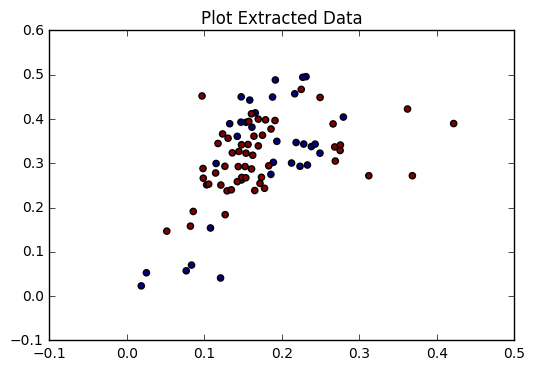

In [160]:
import matplotlib.pyplot as plt
plt.title('Plot Extracted Data')
plt.scatter(allExtractedData[:,0], allExtractedData[:,1], c=all_labels)
plt.show()

In [161]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity = 15)
X_tsne = tsne.fit_transform(allExtractedData)
X_tsne.shape

(87L, 2L)

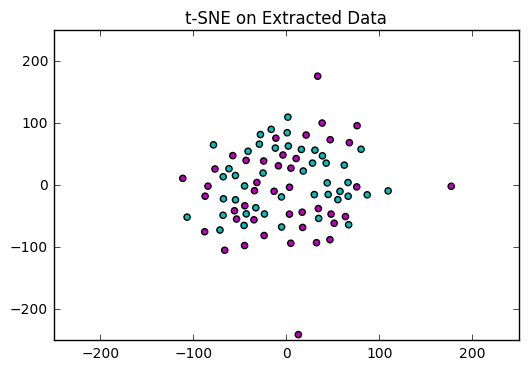

In [162]:
import matplotlib.pyplot as plt
plt.title('t-SNE on Extracted Data')
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=('c','m'))
plt.xlim(-250, 250)
plt.ylim(-250, 250)

plt.show()

In [163]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(allExtractedData)
X_pca.shape

(87L, 2L)

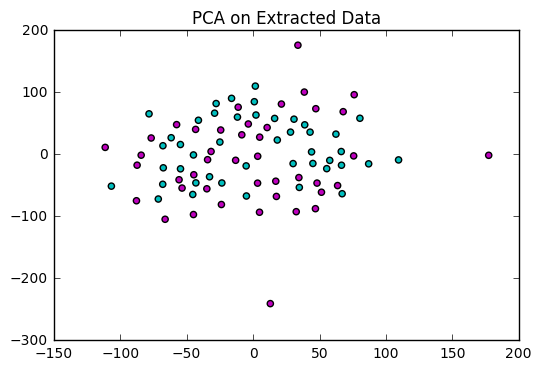

In [164]:
import matplotlib.pyplot as plt
plt.title('PCA on Extracted Data')
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=('c','m'))
#plt.xlim(-250, 250)
#plt.ylim(-250, 250)
plt.show()

In [165]:
collection_name = "TakeOffNov61"
collection = db[collection_name]
documents = collection.find({})
currentTrialData = []
for document in documents:
    dataArray = document['data']
    currentTrialData.append(dataArray)

dataArray = np.array(currentTrialData)

#take gradient of all features
gAccX = np.gradient(dataArray[:,0])
gAccY = np.gradient(dataArray[:,1])
gAccZ = np.gradient(dataArray[:,2])
gAccMag = np.gradient(dataArray[:,3])
gGyrX = np.gradient(dataArray[:,4])
gGyrY = np.gradient(dataArray[:,5])
gGyrZ = np.gradient(dataArray[:,6])
gPitch = np.gradient(dataArray[:,7])
gRoll = np.gradient(dataArray[:,8])
gAlt = np.gradient(dataArray[:,9])
valGradientArray = np.array([gAccX, gAccY, gAccZ, gAccMag, gGyrX, gGyrY, gGyrZ, gPitch, gRoll, gAlt])
valGradientArray = valGradientArray.T #take transpose to get them as columns instead of rows 

#extract features from raw and feature extracted data
valStd = np.std(dataArray, axis=0)
valMean = np.mean(dataArray, axis=0)
valVariance = np.var(dataArray, axis=0)
valMax = np.max(dataArray, axis=0)
valGradientStd = np.std(valGradientArray, axis=0)
valGradientMean = np.mean(valGradientArray, axis=0)
valGradientVar = np.var(valGradientArray, axis=0)
valGradientMax = np.max(valGradientArray, axis=0)

#concatenate features
extractedData = np.concatenate((valStd, valMean, valVariance, valMax, valGradientStd, valGradientMean, valGradientVar,
                               valGradientMax), axis=0)
extDataArray = np.array(extractedData)
extDataArray.shape

(80L,)

In [166]:
#predict using KNN
knn_result = knn_classifier.predict(extDataArray)
#print result

length = len(knn_result)
#print length
num_ones = np.count_nonzero(knn_result,axis=0)
#print num_ones
if (num_ones/float(length)) > 0.50:
    print "Novice"
else:
    print "Expert"
print num_ones/float(length)

Novice
1.0


C:\Users\Ameya\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [167]:
#predict using SVM
svm_result = svm_classifier.predict(extDataArray)
length = len(svm_result)
#print length
num_ones = np.count_nonzero(svm_result,axis=0)
#print num_ones
if (num_ones/float(length)) > 0.50:
    print "Novice"
else:
    print "Expert"
print num_ones/float(length)

Novice
1.0


C:\Users\Ameya\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [168]:
#predict using Decision Tree
dt_result = dt_classifier.predict(extDataArray)
length = len(dt_result)
#print length
num_ones = np.count_nonzero(dt_result,axis=0)
#print num_ones
if (num_ones/float(length)) > 0.50:
    print "Novice"
else:
    print "Expert"
print num_ones/float(length)

Novice
1.0


C:\Users\Ameya\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
